# Examine distances

Examine the distances at which clusters are formed. The height increases monotonically, but the change in the number of clusters may reverse direction.

## Import libraries

In [1]:
from cyr2phon.cyrcluster import *
import matplotlib.pyplot as plt
from matplotlib import gridspec # supports different widths for subplots

## Function to generate report for each stanza

In [2]:
def examine_heights(df):
    stanzas = df.groupby(level=[0,1])
    c = 0
    for id, lines in stanzas:
        if c < ceiling:
            print(pd.concat([lines["Text"].str.replace(r"<[^>]+?>", ""), lines[["RhymeWord", "RhymeZone"]]], axis=1)) # diagnostic
            data = lines.copy().filter(regex=r"^token\d_") # only one-hot features
            labelList = list(range(1, len(lines)+1)) # labels are line numbers within stanza
            data.loc[:,"LineNo"] = [2 * n / len(labelList) for n in labelList] # scale to avoid tyranny of proximity
            ward = linkage(data, method="ward")
            print(ward)
            fig = plt.figure(figsize=(15,5))
            gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2]) # specify subplots of different widths
            ax = fig.add_subplot(gs[0])
            ax.set_title('Ward linkage')
            dendrogram(ward)
            ax = fig.add_subplot(gs[1])
            ax.set_title('Heights')
            # plot lines separately to label them
            x = range(len(ward))
            heights = ward[:, 2]
            nodecounts = ward[:, 3]
            ax.plot(x, heights, label=("height"))
            for i, j in zip(x, heights):
                ax.annotate(round(j, 2), xy=(i, j - 0.2))
            ax.plot(x, nodecounts, label=("number of nodes"))
            for i, j in zip(x, nodecounts):
                ax.annotate(int(j), xy=(i, j + 0.3))
            ax.legend(loc='best')
            plt.show()
        c += 1

## Get data

`explore()` returns a df

### Eugene Onegin

Test first with Onegin data, where rhymes are all paired

                                                   Text  RhymeWord RhymeZone
PoemId StanzaNo LineNo                                                      
Eo.1   1        1       "Мой дядя самых честных правил,     prAVil      AVil
                2             Когда не в шутку занемог,    zaNimOk        Ok
                3              Он уважать себя заставил   zastAVil      AVil
                4              И лучше выдумать не мог.      NimOk        Ok
                5              Его пример другим наука;      naUka       Uka
                6             Но, боже мой, какая скука      skUka       Uka
                7       С больным сидеть и день и ночь,       inOČ        OČ
                8              Не отходя ни шагу прочь!       prOČ        OČ
                9                Какое низкое коварство  kavArstva    Arstva
                10               Полу-живого забавлять,   zabavLAT        AT
                11              Ему подушки поправлять,  papravLAT        AT

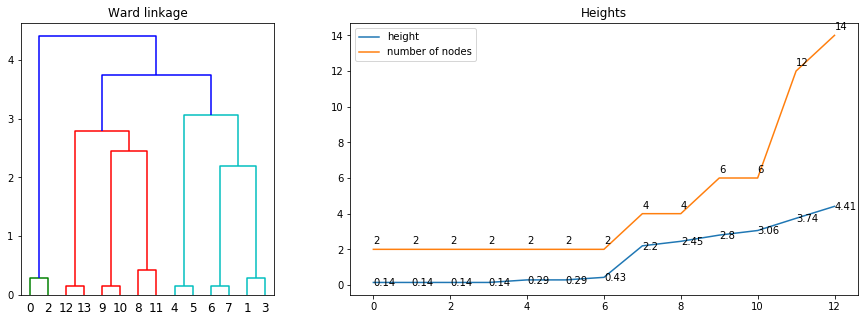

                                                 Text   RhymeWord RhymeZone
PoemId StanzaNo LineNo                                                     
Eo.1   2        1           Так думал молодой повеса,      paVEsa       Esa
                2            Летя в пыли на почтовых,  napaČtavIx        Ix
                3              Всевышней волею Зевеса      ZiVEsa       Esa
                4       Наследник всех своих родных.—      radnIx        Ix
                5           Друзья Людмилы и Руслана!    iruslAna       Ana
                6               С героем моего романа      ramAna       Ana
                7         Без предисловий, сей же час         ČAs        As
                8          Позвольте познакомить вас:         vAs        As
                9        Онегин, добрый мой приятель,    pRiJATiL      ATiL
                10            Родился на брегах Невы,        NivI        vI
                11        Где может быть родились вы,          vI        vI
            

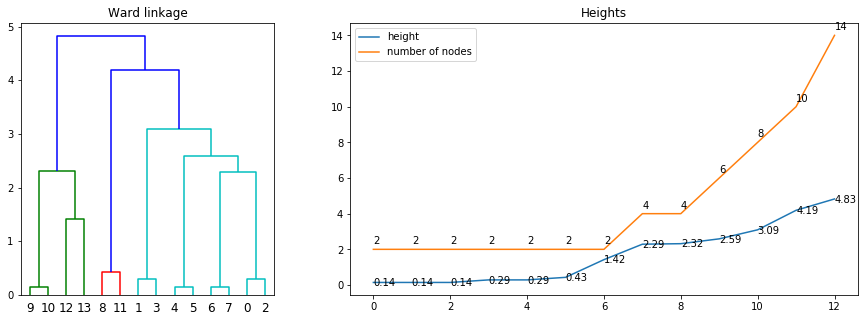

                                                     Text           RhymeWord  \
PoemId StanzaNo LineNo                                                          
Eo.1   3        1              Служив отлично-благородно,  aTLiČna-blagarOdna   
                2                   Долгами жил его отец,               aTEts   
                3                 Давал три бала ежегодно           JižigOdna   
                4                   И промотался наконец.            nakaNEts   
                5                 Судьба Евгения хранила:             xraNIla   
                6            Сперва Madame за ним ходила,              xaDIla   
                7               Потом Monsieur ее сменил;              sMiNIl   
                8              Ребенок был резов, но мил.               naMIl   
                9        Monsieur l'Abbé, француз убогой,              ubOgaJ   
                10               Чтоб не измучилось дитя,                DiTA   
                11          

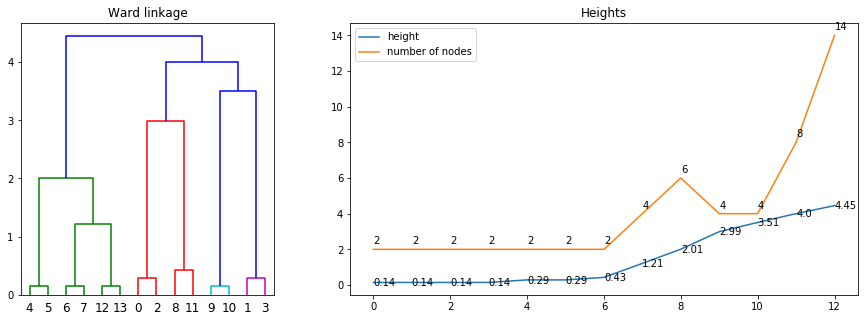

                                                  Text     RhymeWord RhymeZone
PoemId StanzaNo LineNo                                                        
Eo.1   4        1             Когда же юности мятежной      MiTEžnaJ     EžnaJ
                2                 Пришла Евгению пора,          parA        rA
                3         Пора надежд и грусти нежной,        NEžnaJ     EžnaJ
                4          Monsieur прогнали со двора.       sadvarA        rA
                5           Вот мой Онегин на свободе;     nasvabODi       ODi
                6          Острижен по последней моде;          mODi       ODi
                7           Как dandy лондонской одет—          aDEt        Et
                8               И наконец увидел свет.          sVEt        Et
                9          Он по-французски совершенно     saViršEna       Ena
                10            Мог изьясняться и писал;        iPisAl        Al
                11             Легко мазурку танцова

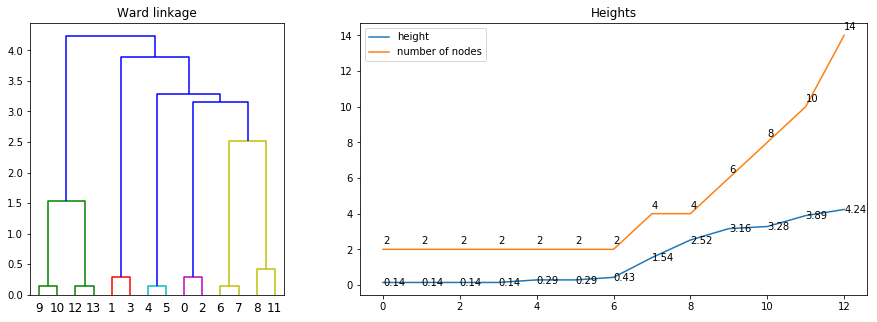

                                                    Text   RhymeWord RhymeZone
PoemId StanzaNo LineNo                                                        
Eo.1   5        1               Мы все учились понемногу   paNimnOgu       Ogu
                2              Чему-нибудь и как-нибудь,  ikak-NibUT        UT
                3           Так воспитаньем, слава богу,        bOgu       Ogu
                4              У нас немудрено блеснуть.     bLisnUT        UT
                5            Онегин был по мненью многих      mnOGix      OGix
                6          (Судей решительных и строгих)    istrOGix      OGix
                7               Ученый малый, но педант:    naPidAnt       Ant
                8              Имел он счастливый талант      talAnt       Ant
                9            Без принужденья в разговоре  vrazgavORi       ORi
                10            Коснуться до всего слегка,       SLikA        kA
                11               С ученым видом знат

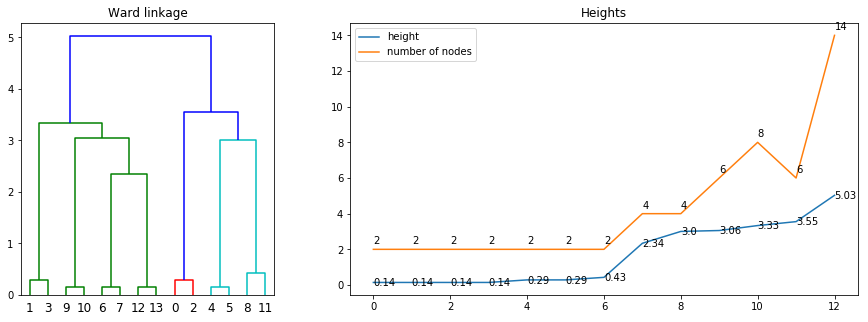

In [6]:
ceiling = 5
df = explore("data_samples/eo1.xml", ceiling=ceiling, ward=False)
examine_heights(df)

### Brjusov

In this Brjusov example, the rhyme scheme is AbCbbbb

                                                                                          Text RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                                
brjusov_voron_1924 1        1       Как-то в полночь, в час унылый, я вникал, устав, без силы,    BiSIli       Ili
                            2                 Меж томов старинных, в строки рассужденья одного    adnavO        vO
                            3                  По отвергнутой науке, и расслышал смутно звуки,     zvUKi       UKi
                            4                Вдруг у двери словно стуки, — стук у входа моего.    maJivO        vO
                            5             «Это — гость, — пробормотал я, — там, у входа моего.    maJivO        vO
                            6                                      ‎Гость, — и больше ничего!»    NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.5773502

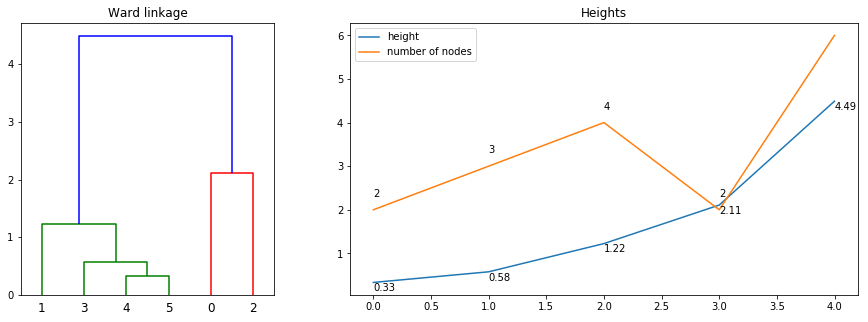

                                                                                        Text  RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                               
brjusov_voron_1924 2        1       Ах! мне помнится так ясно: был декабрь и день ненастный,  NinAstniJ    AstniJ
                            2              Был как призрак — отсвет красный от камина моего.     maJivO        vO
                            3             Ждал зари я в нетерпеньи, в книгах тщетно утешенье   uTišENJi      ENJi
                            4        Я искал в ту ночь мученья, — бденья ночь, без той, кого       kavO        vO
                            5                  Звали здесь Линор. То имя… Шепчут ангелы его,       JivO        vO
                            6                                        ‎На земле же — нет его.       JivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.    

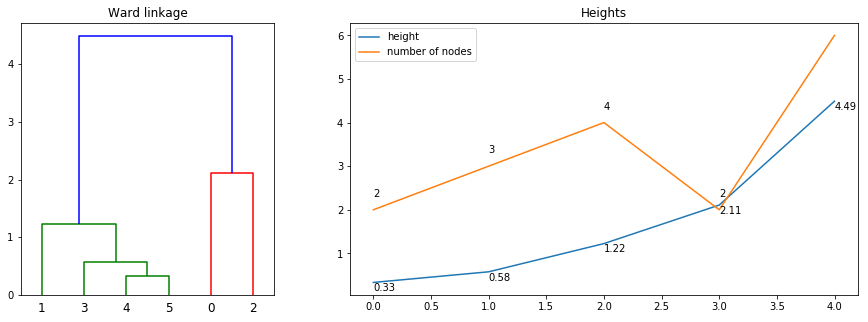

                                                                                    Text  RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                           
brjusov_voron_1924 3        1              Шелковистый и не резкий, шорох алой занавески  zanaVEsKi      EsKi
                            2       Мучил, полнил темным страхом, что не знал я до того.     datavO        vO
                            3        Чтоб смирить в себе биенья сердца, долго в утешенье  vuTišENJi      ENJi
                            4           Я твердил: «То — посещенье просто друга одного.»     adnavO        vO
                            5             Повторял: «То — посещенье просто друга одного,     adnavO        vO
                            6                                  ‎Друга, — больше ничего!»     NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.

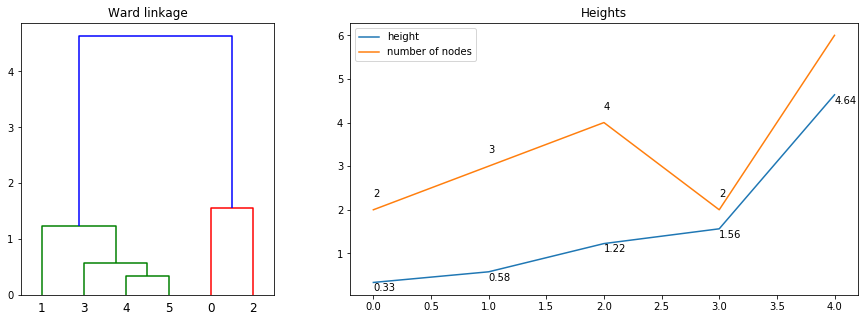

                                                                                   Text  RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                          
brjusov_voron_1924 4        1           Наконец, владея волей, я сказал, не медля боле:       bOLi       OLi
                            2        «Сэр иль Мистрисс, извините, что молчал я до того.     datavO        vO
                            3       Дело в том, что задремал я, и не сразу расслыхал я,  raslixALi       ALi
                            4           Слабый стук не разобрал я, стук у входа моего.»     maJivO        vO
                            5                Говоря, открыл я настежь двери дома моего.     maJivO        vO
                            6                                 ‎Тьма, — и больше ничего.     NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [0.         2.         1.20185043

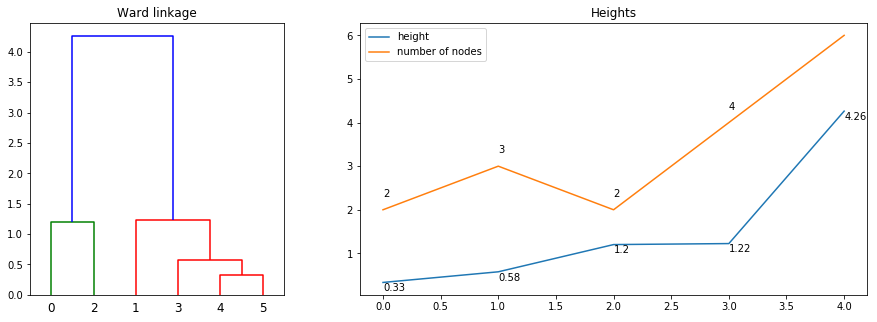

                                                                                     Text RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                           
brjusov_voron_1924 5        1         И, смотря во мрак глубокий, долго ждал я, одинокий,  aDinOKiJ      OKiJ
                            2       Полный грез, что ведать смертным не давалось до того!    datavO        vO
                            3          Все безмолвно было снова, тьма вокруг была сурова,    surOva       Ova
                            4               Раздалось одно лишь слово: шепчут ангелы его.      JivO        vO
                            5               Я шепнул: «Линор», и эхо — повторило мне его,      JivO        vO
                            6                                      ‎Эхо, — больше ничего.    NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.

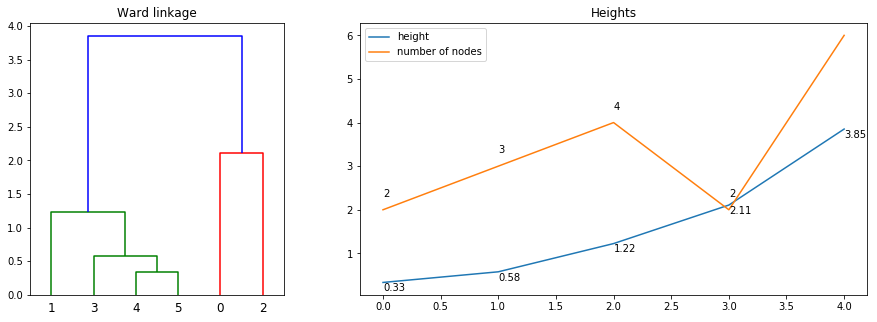

                                                                                     Text     RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                               
brjusov_voron_1924 6        1           Лишь вернулся я несмело (вся душа во мне горела),        gaREla       Ela
                            2       Вскоре вновь я стук расслышал, но ясней, чем до того.        datavO        vO
                            3         Но сказал я: «Это ставней ветер зыблет своенравней,  svaJinrAvNiJ     AvNiJ
                            4          Он и вызвал страх недавний, ветер, только и всего,        ifSivO        vO
                            5         Будь спокойно, сердце! Это — ветер, только и всего.        ifSivO        vO
                            6                                   ‎Ветер, — больше ничего!»        NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.    

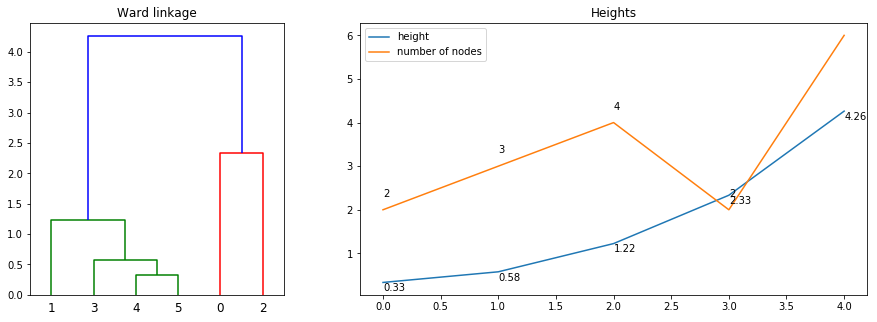

                                                                                      Text  RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                             
brjusov_voron_1924 7        1               Растворил свое окно я, и влетел во глубь покоя     pakOJi       OJi
                            2       Статный, древний Ворон, шумом крыльев славя торжество.  taržistvO        vO
                            3           Поклониться не хотел он; не колеблясь, полетел он,  paLiTElan      Elan
                            4             Словно лорд иль лэди, сел он, сел у входа моего,     maJivO        vO
                            5               Там, на белый бюст Паллады, сел у входа моего,     maJivO        vO
                            6                                     ‎Сел, — и больше ничего.     NiČivO        vO
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.      

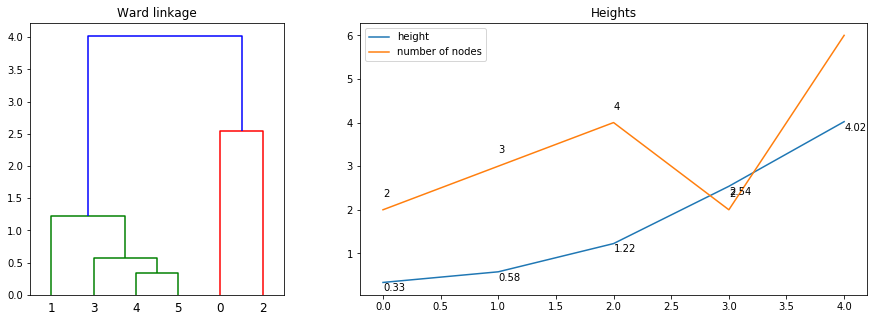

                                                                                            Text RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                                  
brjusov_voron_1924 8        1                      Я с улыбкой мог дивиться, как эбеновая птица,    pTItsa      Itsa
                            2                    В строгой важности — сурова и горда была тогда.     tagdA        dA
                            3              «Ты, — сказал я, — лыс и черен, но не робок и упорен,   iupORin      ORin
                            4       Древний, мрачный Ворон, странник с берегов, где ночь всегда!    fSigdA        dA
                            5                  Как же царственно ты прозван у Плутона?» Он тогда     tagdA        dA
                            6                                        ‎Каркнул: «Больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.  

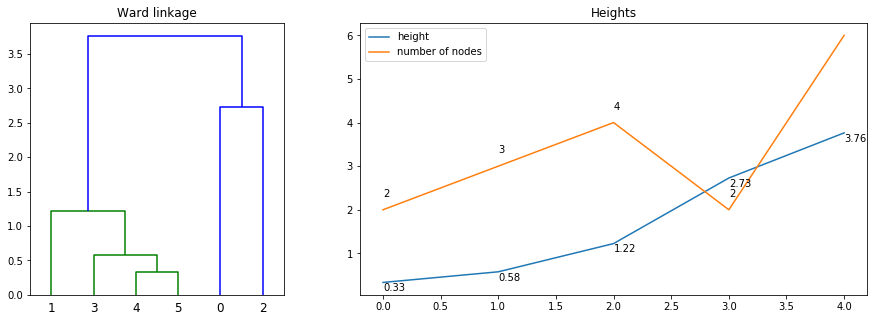

                                                                                Text  RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                       
brjusov_voron_1924 9        1            Птица ясно прокричала, изумив меня сначала.    snaČAla       Ala
                            2         Было в крике смысла мало, и слова не шли сюда.       SudA        dA
                            3       Но не всем благословенье было — ведать посещенье  paSiQENJi      ENJi
                            4         Птицы, что над входом сядет, величава и горда,     igardA        dA
                            5          Что на белом бюсте сядет, чернокрыла и горда,     igardA        dA
                            6                           ‎С кличкой «Больше никогда!»    NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.        ]
 [0.       

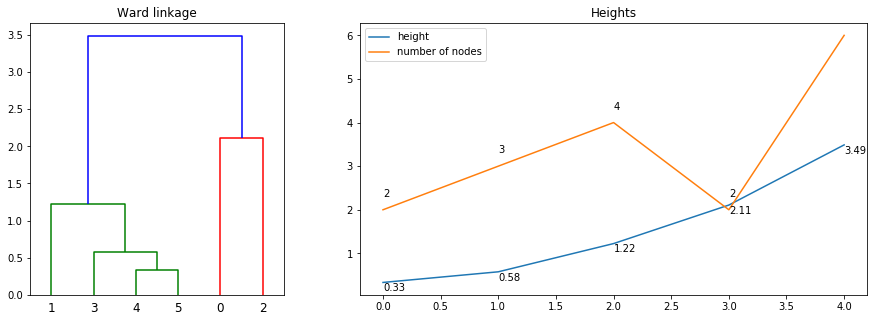

                                                                                      Text RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                            
brjusov_voron_1924 10       1        Одинокий, Ворон черный, сев на бюст, бросал, упорный,   upOrniJ     OrniJ
                            2         Лишь два слова, словно душу вылил в них он навсегда.  nafSigdA        dA
                            3       Их твердя, он словно стынул, ни одним пером не двинул,  NidVInul      Inul
                            4           Наконец, я птице кинул: «Раньше скрылись без следа   BiSLidA        dA
                            5        Все друзья; ты завтра сгинешь безнадежно!..» Он тогда     tagdA        dA
                            6                                  ‎Каркнул: «Больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.   

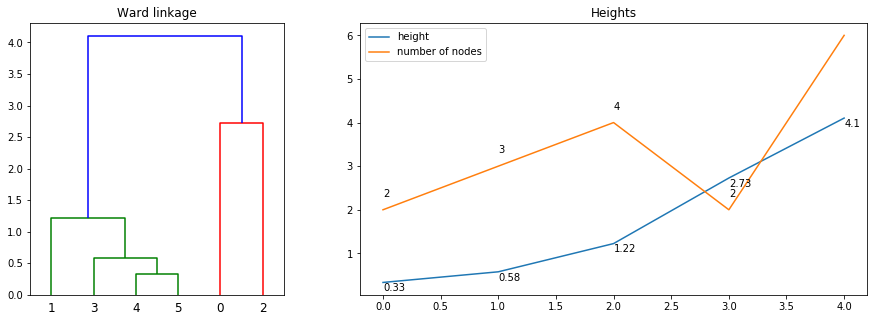

                                                                                          Text RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                                
brjusov_voron_1924 11       1       Вздрогнул я, в волненьи мрачном, при ответе столь удачном.   udAČnam     AČnam
                            2          «Это — все, — сказал я, — видно, что он знает, жив года      gadA        dA
                            3                     С бедняком, кого терзали беспощадные печали,    PiČALi       ALi
                            4                     Гнали в даль и дальше гнали неудачи и нужда.    inuždA        dA
                            5                К песням скорби о надеждах лишь один припев нужда     nuždA        dA
                            6                                         ‎Знала: больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.5773502

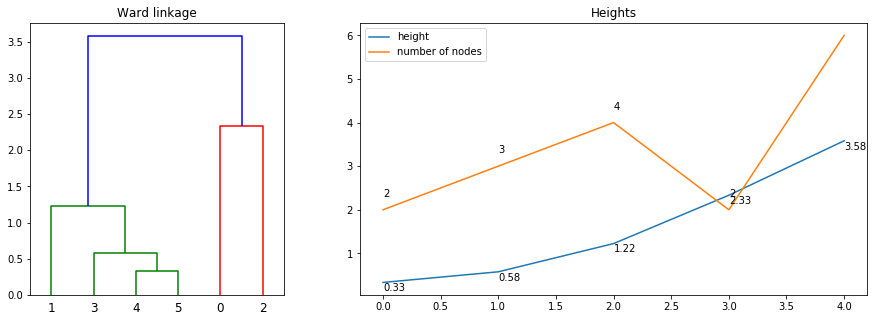

                                                                                      Text RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                            
brjusov_voron_1924 12       1       Я с улыбкой мог дивиться, как глядит мне в душу птица.    pTItsa      Itsa
                            2            Быстро кресло подкатил я, против птицы, сел туда:      tudA        dA
                            3         Прижимаясь к мягкой ткани, развивал я цепь мечтаний,  MiČtANiJ      ANiJ
                            4           Сны за снами; как в тумане, думал я: «Он жил года,      gadA        dA
                            5          Что ж пророчит, вещий, тощий, живший в старые года,      gadA        dA
                            6                                    ‎Криком: больше никогда?»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.   

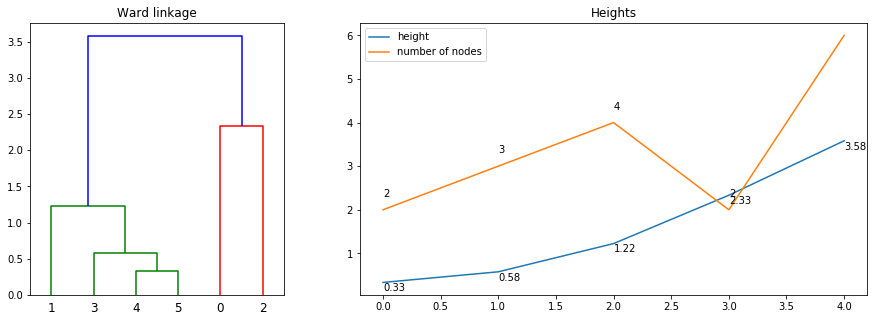

                                                                                   Text RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                         
brjusov_voron_1924 13       1       Это думал я с тревогой, но не смел шепнуть ни слога   NislOga       Oga
                            2           Птице, чьи глаза палили сердце мне огнем тогда.     tagdA        dA
                            3                Это думал и иное, прислонясь челом в покое   fpakOJi       OJi
                            4            К бархату; мы, прежде, двое так сидели иногда…    inagdA        dA
                            5          Ах! при лампе, не склоняться ей на бархат иногда    inagdA        dA
                            6                                  ‎Больше, больше никогда!   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.        ]
 [1.         7.         1.22474487 4.     

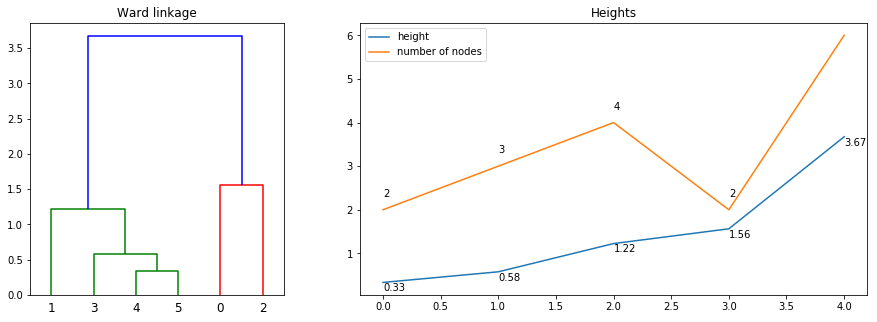

                                                                                             Text RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                                   
brjusov_voron_1924 14       1                    И, казалось, клубы дыма льет курильница незримо,   NizRIma       Ima
                            2                     Шаг чуть слышен серафима, с ней вошедшего сюда.      SudA        dA
                            3       «Бедный! — я вскричал, — то богом послан отдых всем тревогам,  tRivOgam      Ogam
                            4             Отдых, мир! чтоб хоть немного ты вкусил забвенье, — да?        dA        dA
                            5             Пей! о, пей тот сладкий отдых! позабудь Линор, — о, да?       adA        dA
                            6                                           ‎Ворон: «Больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.     

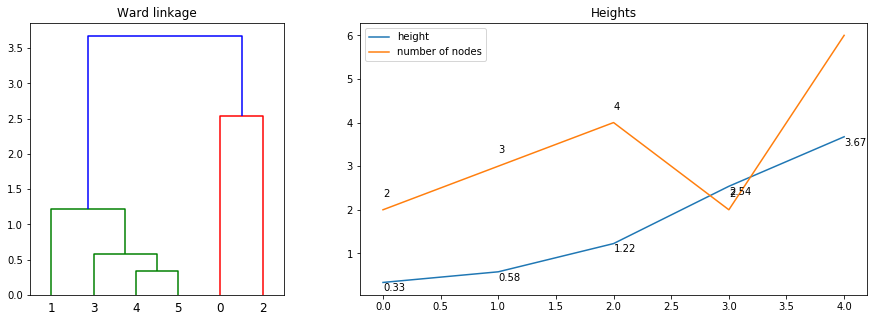

                                                                                         Text RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                               
brjusov_voron_1924 15       1       «Вещий, — я вскричал, — зачем он прибыл, птица или демон?  iLiDEman      Eman
                            2                   Искусителем ли послан, бурей пригнан ли сюда?      SudA        dA
                            3           Я не пал, хоть полн уныний! В этой за́клятой пустыне,   pustINi       INi
                            4               Здесь, где правит ужас ныне, отвечай, молю, когда     kagdA        dA
                            5                   В Галааде мир найду я? обрету бальзам когда?»     kagdA        dA
                            6                                       ‎Ворон: «Больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.    

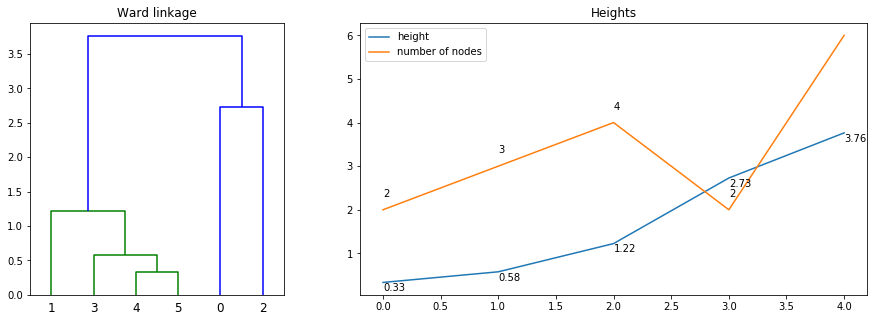

                                                                                         Text RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                               
brjusov_voron_1924 16       1       «Вещий, — я вскричал, — зачем он прибыл, птица или демон?  iLiDEman      Eman
                            2                   Ради неба, что над нами, часа страшного суда,      sudA        dA
                            3             Отвечай душе печальной: я в раю, в отчизне дальной,    dALnaJ     ALnaJ
                            4             Встречу ль образ идеальный, что меж ангелов всегда?    fSigdA        dA
                            5                    Ту мою Линор, чье имя шепчут ангелы всегда?»    fSigdA        dA
                            6                                       ‎Ворон: «Больше никогда!»   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.57735027 3.    

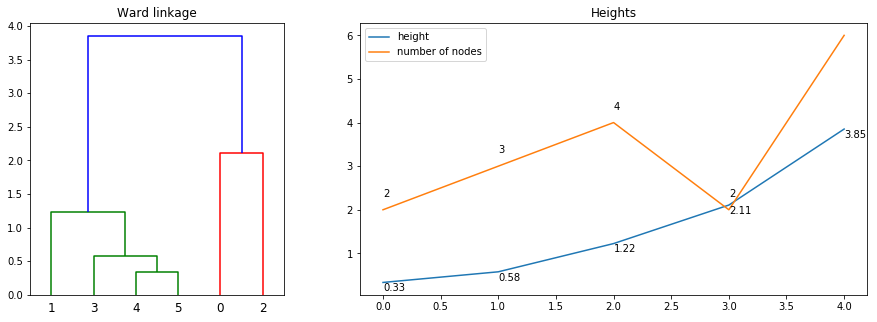

                                                                                            Text  RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                                   
brjusov_voron_1924 17       1                «Это слово — знак разлуки! — крикнул я, ломая руки.       rUKi       UKi
                            2                Возвратись в края, где мрачно плещет Стиксова вода!       vadA        dA
                            3        Не оставь здесь перьев черных, как следов от слов позорных!   pazOrnix     Ornix
                            4            Не хочу друзей тлетворных! С бюста — прочь, и навсегда!  inafSigdA        dA
                            5       Прочь — из сердца клюв, и с двери — прочь виденье навсегда!»   nafSigdA        dA
                            6                                          ‎Ворон: «Больше никогда!»    NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.     

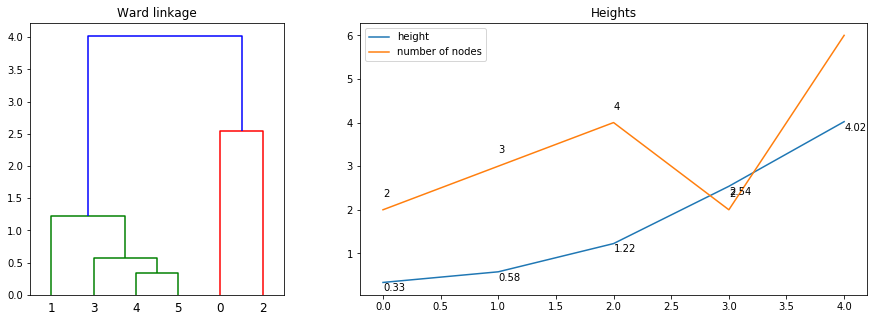

                                                                                          Text RhymeWord RhymeZone
PoemId             StanzaNo LineNo                                                                                
brjusov_voron_1924 18       1       И, как будто с бюстом слит он, все сидит он, все сидит он,   SiDItan      Itan
                            2       Там, над входом, Ворон черный, с белым бюстом слит всегда!    fSigdA        dA
                            3            Светом лампы озаренный, смотрит, словно демон сонный.     sOniJ      OniJ
                            4                    Тень ложится удлиненно, на полу лежит года, —      gadA        dA
                            5               И душе не встать из тени, пусть идут, идут года, —      gadA        dA
                            6                                         ‎Знаю, — больше никогда!   NikagdA        dA
[[4.         5.         0.33333333 2.        ]
 [3.         6.         0.5773502

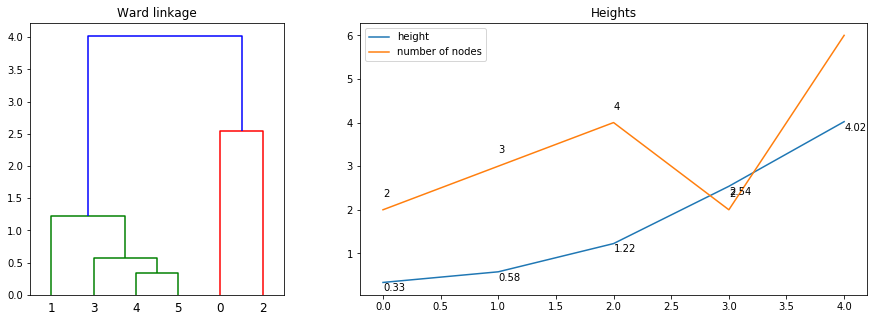

In [11]:
ceiling = 20
df = explore("data_samples/brjusov_voron.xml", ceiling=ceiling, ward=False)
pd.set_option('display.width', 1000) # don't wrap long rows
pd.set_option('display.max_colwidth', 200) # don't truncate columns
examine_heights(df)
pd.set_option('display.width', 80) # restore default
pd.set_option('display.max_colwidth', 50) # restore default